In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import signal
from scipy.interpolate import CubicSpline
import mpl_axes_aligner 
import seaborn as sns
import csv

sns.set_theme(style="darkgrid")

%matplotlib widget

# data=pd.read_csv("not_moving_trot.csv")
# table=data[7500:]

#files are named gait-speed-period
filename="gallop-3.0-0.2"
data=pd.read_csv(filename+".csv")
csv_file = "data/"+filename+'_data.csv'

table=data[-20001:-1]
print(len(table.index))
table.reset_index(drop=True, inplace=True)

holder=[]
for i in range(len(table.index)):
    holder.append(table.qd00[i]*table.t00[i])
table.insert(len(table.columns), "p00", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd01[i]*table.t01[i])
table.insert(len(table.columns), "p01", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd02[i]*table.t02[i])
table.insert(len(table.columns), "p02", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd10[i]*table.t10[i])
table.insert(len(table.columns), "p10", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd11[i]*table.t11[i])
table.insert(len(table.columns), "p11", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd12[i]*table.t12[i])
table.insert(len(table.columns), "p12", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd20[i]*table.t20[i])
table.insert(len(table.columns), "p20", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd21[i]*table.t21[i])
table.insert(len(table.columns), "p21", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd22[i]*table.t22[i])
table.insert(len(table.columns), "p22", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd30[i]*table.t30[i])
table.insert(len(table.columns), "p30", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd31[i]*table.t31[i])
table.insert(len(table.columns), "p31", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd32[i]*table.t32[i])
table.insert(len(table.columns), "p32", holder, True)

table


20000


,time,iterations,bodyOrientation0,bodyOrientation1,bodyOrientation2,bodyOrientation3,vb0,rpy0,omegab0,omega0,...,p02,p10,p11,p12,p20,p21,p22,p30,p31,p32
0,50.416,25208,0.826528,-0.003276,0.101834,0.553597,3.00945,0.109173,-0.798293,-0.469516,...,70.080117,0.801896,69.820389,-0.982853,0.654049,42.842014,261.429065,1.451235,-3.376851,30.403786
1,50.417,25208,0.826592,-0.003691,0.101635,0.553537,3.01092,0.108239,-0.892122,-0.477103,...,66.679290,1.128792,83.010165,-0.555701,0.437754,28.415133,234.381020,-0.499629,-3.493155,34.855356
2,50.418,25209,0.826663,-0.004123,0.101408,0.553468,3.01245,0.107241,-0.951191,-0.475373,...,66.727260,1.096493,85.719348,-0.649156,0.454558,27.238248,189.742909,-2.356566,-3.420831,34.108452
3,50.419,25209,0.826732,-0.004732,0.101054,0.553425,3.01082,0.105805,-1.388980,-0.623891,...,75.688424,2.694715,100.587133,-0.413030,0.008471,9.408733,60.428468,5.657237,1.253632,-6.470517
4,50.420,25210,0.826798,-0.005511,0.100609,0.553401,3.01017,0.103983,-1.776890,-0.800523,...,69.586172,2.368379,102.944524,-0.608213,-0.356239,8.503125,21.156923,5.421214,0.199831,-7.851263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,70.411,35205,0.826457,0.018540,0.086878,0.555947,2.96732,0.128572,-1.047220,-0.986944,...,58.578703,-1.456982,41.193765,-2.075896,0.390086,25.280428,65.119635,7.345975,-2.717517,43.830667
19996,70.412,35206,0.826494,0.017970,0.086813,0.555921,2.97067,0.127547,-1.010890,-0.875707,...,60.663164,-0.836345,43.210283,-2.149706,0.538564,28.420416,100.654725,-0.704310,-3.001840,40.808646
19997,70.413,35206,0.826536,0.017427,0.086724,0.555890,2.97331,0.126537,-0.993650,-0.806245,...,59.021573,-0.065532,52.410795,-1.346750,0.519368,31.177662,133.993444,-3.941139,-2.963121,44.019799
19998,70.414,35207,0.826580,0.016924,0.086654,0.555850,2.97785,0.125616,-0.903009,-0.761938,...,59.094325,0.132715,54.042702,-1.428432,0.489233,32.754856,161.572237,-4.914060,-2.505592,41.249719


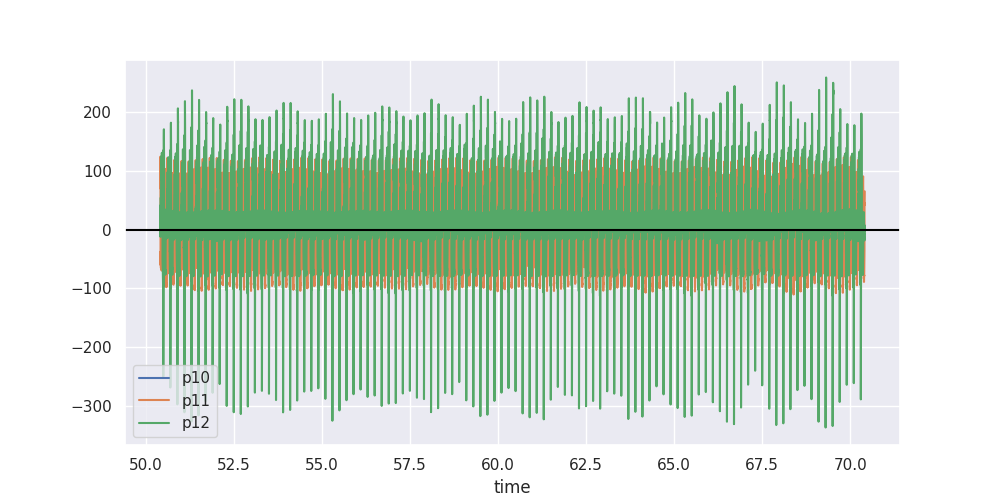

In [3]:
plt.close()
plt.figure(figsize=(10,5))
ax = plt.gca()

# table.plot( x = 'time' , y = 'q01', ax = ax )
# table.plot( x = 'time' , y = 'p00', ax = ax )
# table.plot( x = 'time' , y = 'p01', ax = ax )
# table.plot( x = 'time' , y = 'p02', ax = ax )

table.plot( x = 'time' , y = 'p10', ax = ax )
table.plot( x = 'time' , y = 'p11', ax = ax )
table.plot( x = 'time' , y = 'p12', ax = ax )

# table.plot( x = 'time' , y = 'p20', ax = ax )
# table.plot( x = 'time' , y = 'p21', ax = ax )
# table.plot( x = 'time' , y = 'p22', ax = ax )

# table.plot( x = 'time' , y = 'p30', ax = ax )
# table.plot( x = 'time' , y = 'p31', ax = ax )
# table.plot( x = 'time' , y = 'p32', ax = ax )

# table.plot( x = 'time' , y = 'p02', ax = ax )
# table.plot( x = 'time' , y = 'qd00', ax = ax )
# table.plot( x = 'time' , y = 't00', ax = ax )
# table.plot( x = 'time' , y = 't01', ax = ax )

plt.axhline(y=0.0, color='black', linestyle='-')

plt.show()

In [4]:
def calculate_areas(start,end):
    positive_area=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    negative_area=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    time=0.001
    columns=['p00','p01','p02','p10','p11','p12','p20','p21','p22','p30','p31','p32']
    for jj in range(len(columns)):
        for i in range(end-start):
            first_area=0.0
            second_area=0.0
            # print(table.p01[i+start],"  ",table.p01[i+start+1])
            if(table.loc[i+start,columns[jj]]>=0.0 and table.loc[i+start+1,columns[jj]]>=0.0):
                positive_area[jj]+=(table.loc[i+start,columns[jj]]+table.loc[i+start+1,columns[jj]])*time/2
            elif(table.loc[i+start,columns[jj]]<0.0 and table.loc[i+start+1,columns[jj]]<0.0):
                negative_area[jj]+=(table.loc[i+start,columns[jj]]+table.loc[i+start+1,columns[jj]])*time/2
            else:
                intersect=table.loc[i+start,columns[jj]]/(table.loc[i+start,columns[jj]]-table.loc[i+start+1,columns[jj]])*time
                first_area=table.loc[i+start,columns[jj]]*intersect/2
                second_area=table.loc[i+start+1,columns[jj]]*(time-intersect)/2
                if(first_area >=0.0):
                    positive_area[jj]+=first_area
                    negative_area[jj]+=second_area
                else:
                    positive_area[jj]+=second_area
                    negative_area[jj]+=first_area
    return positive_area,negative_area

def analyze_areas(start,end):
    min_power=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    max_power=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    start_window=[0,0,0,0,0,0,0,0,0,0,0,0]
    end_window=[0,0,0,0,0,0,0,0,0,0,0,0]
    max_neg_energy=[99999.9,99999.0,99999.0,99999.9,99999.0,99999.0,99999.9,99999.0,99999.0,99999.9,99999.0,99999.0]
    time=0.001
    columns=['p00','p01','p02','p10','p11','p12','p20','p21','p22','p30','p31','p32']
    for jj in range(len(columns)):
        temp_holder=0
        tmp_start=0
        tmp_end=0;
        for i in range(end-start):
            first_area=0.0
            second_area=0.0
            # print(table.p01[i+start],"  ",table.p01[i+start+1])
            if(table.loc[i+start,columns[jj]]>=0.0 and table.loc[i+start+1,columns[jj]]>=0.0):
                if( max_neg_energy[jj] > temp_holder):
                    max_neg_energy[jj]=temp_holder
                    start_window[jj]=tmp_start
                    end_window[jj]=tmp_end
                temp_holder=0
                tmp_start=i+start
            elif(table.loc[i+start,columns[jj]]<0.0 and table.loc[i+start+1,columns[jj]]<0.0):
                temp_holder+=(table.loc[i+start,columns[jj]]+table.loc[i+start+1,columns[jj]])*time/2
                tmp_end=i+start+1
            else:
                intersect=table.loc[i+start,columns[jj]]/(table.loc[i+start,columns[jj]]-table.loc[i+start+1,columns[jj]])*time
                first_area=table.loc[i+start,columns[jj]]*intersect/2
                second_area=table.loc[i+start+1,columns[jj]]*(time-intersect)/2
                if(first_area >=0.0):
                    if( max_neg_energy[jj] > temp_holder):
                        max_neg_energy[jj]=temp_holder
                        start_window[jj]=tmp_start
                        end_window[jj]=tmp_end
                    temp_holder=0
                    tmp_start=i+start
                    temp_holder+=second_area
                    tmp_end=i+start+1
                else:
                    temp_holder+=first_area
                    tmp_end=i+start+1
                    if( max_neg_energy[jj] > temp_holder):
                        max_neg_energy[jj]=temp_holder
                        start_window[jj]=tmp_start
                        end_window[jj]=tmp_end
                    temp_holder=0
                    tmp_start=i+start
        if( max_neg_energy[jj] > temp_holder):
            max_neg_energy[jj]=temp_holder
            start_window[jj]=tmp_start
            end_window[jj]=tmp_end
    return max_neg_energy,start_window,end_window

def analyze_range(graph,height_threshold,dist_threshold,start=0,end=20000):
    peaks, _ = find_peaks(table[graph], height=height_threshold,distance=dist_threshold)
    filtered_data=peaks[(peaks >= start) & (peaks <= end)]
    # print(filtered_data)
    # print(len(filtered_data))
    columns=['p00','p01','p02','p10','p11','p12','p20','p21','p22','p30','p31','p32']
    max_neg_energy=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    neg_energy=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    pos_energy=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    window=[0,0,0,0,0,0,0,0,0,0,0,0]
    for tmprng in range(len(filtered_data)-1):
        # print(tmprng)
        a,b=calculate_areas(filtered_data[tmprng],filtered_data[tmprng+1])
        c,d,e=analyze_areas(filtered_data[tmprng],filtered_data[tmprng+1])
        for ii in range(len(columns)):
            pos_energy[ii]+=a[ii]
            neg_energy[ii]+=b[ii]
            max_neg_energy[ii]+=c[ii]
            window[ii]+=(e[ii]-d[ii])
    # max_neg_energy/=len(filtered_data)
    # neg_energy/=len(filtered_data)
    # pos_energy/=len(filtered_data)
    for ii in range(len(columns)):
            pos_energy[ii]=pos_energy[ii]/(len(filtered_data)-1)
            neg_energy[ii]=neg_energy[ii]/(len(filtered_data)-1)
            max_neg_energy[ii]=max_neg_energy[ii]/(len(filtered_data)-1)
            window[ii]=window[ii]/(len(filtered_data)-1)
    print("pos_energy: "+str(pos_energy))
    print("neg_energy: "+str(neg_energy))
    print("avg max_neg_energy: "+str(max_neg_energy))
    print("window: "+str(window))
    
    a,b=calculate_areas(filtered_data[0],filtered_data[-1])
    c,d,e=analyze_areas(filtered_data[0],filtered_data[-1])
    f=[0,0,0,0,0,0,0,0,0,0,0,0]
    for ii in range(len(columns)):
        a[ii]=a[ii]/(len(filtered_data)-1)
        b[ii]=b[ii]/(len(filtered_data)-1)
        f[ii]=e[ii]-d[ii]
    print("avg pos_energy: "+str(a))
    print("avg neg_energy: "+str(b))
    print("max_neg_energy: "+str(c))
    print("avg window: "+str(f))
    with open(csv_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(columns)
        writer.writerow(a) #avg pos_energy
        writer.writerow(b) #avg neg_energy
        writer.writerow(max_neg_energy)  #avg max_neg_energy
        writer.writerow(f) #avg window
        writer.writerow(c) #max_neg_energy
        file.close()
    plt.close()
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    plt.plot(table[graph])
    plt.plot(filtered_data, table[graph][filtered_data], 'ro')  # 'ro' stands for red dots at peak locations
    plt.title('Data with Peaks Above Threshold')
    plt.show()

pos_energy: [0.6114231654351572, 3.5938735828993322, 6.727648089650232, 0.15574052335569563, 3.8786183766854556, 7.410298799401394, 0.12473868314246694, 2.893534317246351, 4.897272722689414, 0.12785474124514945, 3.733298149927679, 5.2159485275776]
neg_energy: [-0.05390682816102861, -5.4221049873107505, -2.949783122362084, -0.433542353971697, -4.9060230644894505, -4.010797593745374, -0.19607542214193854, -3.1895064997410336, -2.6933672100126205, -0.3278264620169458, -3.3089821679247433, -3.2415842498503267]
avg max_neg_energy: [-0.02112878378073658, -2.874406808099619, -1.3052179393994106, -0.28921551070925405, -2.408871680123566, -1.432716013835219, -0.10275289029276224, -1.7613306445912569, -1.4051564486562116, -0.15889768801530635, -1.8043539340505221, -1.525794230672935]
window: [8.222222222222221, 58.464646464646464, 9.98989898989899, 45.58585858585859, 53.101010101010104, 29.232323232323232, 28.03030303030303, 34.04040404040404, 31.11111111111111, 18.747474747474747, 230.010101010

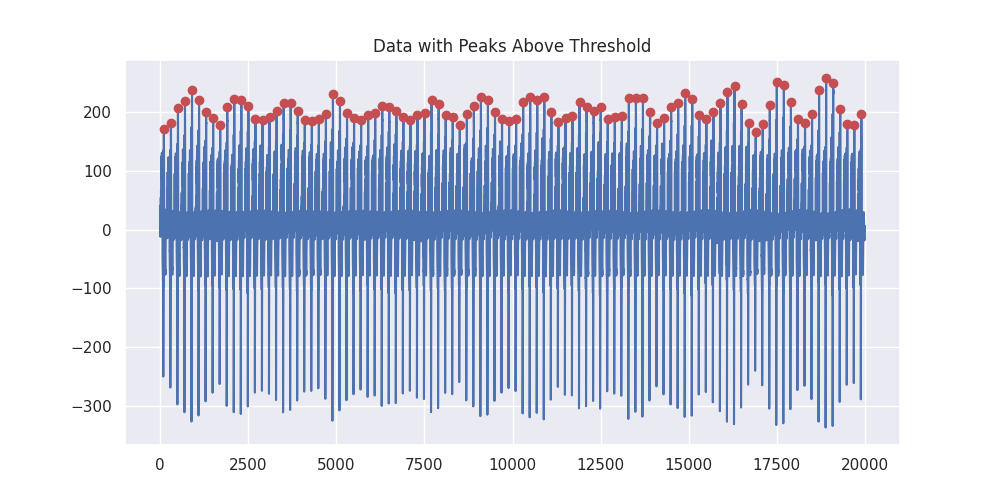

In [5]:
analyze_range('p12',-200,150)